# Third Place Report [V2022]
### Contribution to Architectural Institute of Korea


-----
* Inital research, [MIT Media Lab, City Science](https://www.media.mit.edu/groups/city-science/overview/) <br>
  [Third Place Mobility Energy Consumption Per Person](http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab/index.html) <br>
   <br>

* Paper <br>
  [Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore](https://doi.org/10.1007/978-981-33-4400-6_11)  <br>
  

* Contribution <br> [대한건축학회 : Architectural Institute of Korea](https://www.aik.or.kr/)
  제3 공간 분석과 적용 (디자인, 데이터, 인공지능)  <br> https://brunch.co.kr/@njnamju/148 <br>


-----
#### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# 6. Fitting Network and Implementation

### 6.1. Data processing 

In [1]:
import json
import math
import pandas as pd

In [2]:
PATH = 'data/processed/google-third-place-Boston_DecayClosest.csv'
df = pd.read_csv(PATH, index_col=0) 

classList = ['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storepharmacy', 'physiotherapist', 'place_of_worship', 'plumber', 'police', 'post_office', 'real_estate_agency', 'restaurant', 'roofing_contractor', 'rv_park', 'school', 'shoe_store', 'shopping_mall', 'spa', 'stadium', 'storage', 'store', 'subway_station', 'synagogue', 'taxi_stand', 'train_station', 'travel_agency', 'university', 'veterinary_care', 'zoo']
print(classList)
print(classList.index('cafe'))
print(classList.index('bakery'))

['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storephar

In [3]:

food = pd.concat([
    df.loc[df['class'] == 14],
    df.loc[df['class'] == 6],
    df.loc[df['class'] == classList.index('restaurant')],
    df.loc[df['class'] == classList.index('meal_takeaway')],
 ])
food["class"] = 0
print('food: ', food.shape)

transportation = pd.concat([
    df.loc[df['class'] == classList.index('bicycle_store')],
    df.loc[df['class'] == classList.index('subway_station')],
    df.loc[df['class'] == classList.index('train_station')],
    df.loc[df['class'] == classList.index('gas_station')],
    df.loc[df['class'] == classList.index('car_repair')],
    df.loc[df['class'] == classList.index('car_wash')],
    df.loc[df['class'] == classList.index('car_rental')],
    df.loc[df['class'] == classList.index('taxi_stand')],
    df.loc[df['class'] == classList.index('bus_station')],
    df.loc[df['class'] == classList.index('parking')],
 ])
transportation["class"] = 1
print('transportation: ', transportation.shape)

utility = pd.concat([
    df.loc[df['class'] == classList.index('atm')],
    df.loc[df['class'] == classList.index('bank')],
    df.loc[df['class'] == classList.index('police')],
    df.loc[df['class'] == classList.index('post_office')],
    df.loc[df['class'] == classList.index('fire_station')],
    df.loc[df['class'] == classList.index('laundry')],
    df.loc[df['class'] == classList.index('hospital')],
 ])
utility["class"] = 2
print('utility: ', utility.shape)



food:  (385, 96)
transportation:  (296, 96)
utility:  (409, 96)


In [4]:
CLASS_LIST_REDUCED = ['food', 'transportation', 'utility']
data = pd.concat([food, transportation, utility])
data

accounting       airport  amusement_park      aquarium  art_gallery  \
430   2.377572e-04  1.644371e-03             0.0  4.365467e-09          0.0   
431   2.328291e-04  4.366450e-01             0.0  3.027021e-10          0.0   
432   3.902161e-03  1.063612e-04             0.0  7.834712e-05          0.0   
433   1.477536e-01  3.479457e-07             0.0  2.627459e-09          0.0   
434   4.510121e-10  7.051392e-02             0.0  1.585824e-17          0.0   
...            ...           ...             ...           ...          ...   
2125  6.925554e-09  2.069399e-01             0.0  1.022632e-13          0.0   
2126  2.111980e-07  2.093415e-01             0.0  2.521215e-12          0.0   
2127  2.656944e-08  3.538882e-01             0.0  2.676556e-13          0.0   
2128  1.088731e-05  7.338650e-03             0.0  8.086412e-12          0.0   
2129  1.367593e-04  1.765714e-01             0.0  9.794291e-03          0.0   

           atm    bakery      bank       bar  beauty_salon  ...     store  \
430   0.006019  1.000000  0.006019  1.000000           0.0  ...  0.062787   
431   0.386230  1.000000  0.021517  0.261164           0.0  ...  0.018329   
432   0.159295  1.000000  0.048811  0.002541           0.0  ...  0.390714   
433   0.376911  0.297231  0.109815  0.707896           0.0  ...  0.235334   
434   0.719075  0.250265  0.719075  0.345597           0.0  ...  0.398271   
...        ...       ...       ...       ...           ...  ...       ...   
2125  0.386722  0.771857  0.771857  0.164540           0.0  ...  0.164540   
2126  0.174649  0.119180  0.175293  0.161165           0.0  ...  0.161165   
2127  0.577928  0.493887  0.577928  0.522892           0.0  ...  0.522892   
2128  0.011117  0.009112  0.383570  0.849522           0.0  ...  0.433484   
2129  0.349970  0.275996  0.141458  0.114123           0.0  ...  0.057021   

      subway_station     synagogue  taxi_stand  train_station  travel_agency  \
430     4.678372e-02  1.000000e+00         0.0            0.0       0.008582   
431     4.366450e-01  5.959030e-04         0.0            0.0       0.001346   
432     4.742276e-04  3.787153e-07         0.0            0.0       0.000939   
433     1.341132e-05  5.347537e-03         0.0            0.0       0.036440   
434     1.053440e-08  3.455967e-01         0.0            0.0       0.532853   
...              ...           ...         ...            ...            ...   
2125    1.915013e-05  8.816906e-01         0.0            0.0       0.000060   
2126    1.690389e-04  5.043501e-02         0.0            0.0       0.000002   
2127    1.599003e-05  9.102249e-02         0.0            0.0       0.000007   
2128    7.338650e-03  8.834290e-06         0.0            0.0       0.000037   
2129    2.034488e-06  2.326781e-03         0.0            0.0       0.007914   

        university  veterinary_care           zoo  class  
430   3.266519e-09         0.000335  1.519569e-03      0  
431   6.995351e-03         0.009112  1.300267e-06      0  
432   2.536360e-03         0.000681  1.441724e-06      0  
433   3.451537e-08         0.356757  5.998160e-09      0  
434   5.444820e-05         0.499961  7.536487e-10      0  
...            ...              ...           ...    ...  
2125  1.000000e+00         0.001037  3.352482e-08      2  
2126  4.720610e-01         0.000035  6.227048e-08      2  
2127  3.462296e-01         0.000089  8.821344e-09      2  
2128  5.256961e-02         1.000000  1.200325e-08      2  
2129  4.314005e-01         0.058498  2.685739e-05      2  

[1090 rows x 96 columns]

In [5]:
import math
import json
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data
def getDecay(cost, b = 0.01):
    return math.pow(1 - b, cost)
def distanceGPS2KM(l0, l1):
    R = 6378.137;
    dLat = l1['lat'] * math.pi / 180 - l0['lat'] * math.pi / 180
    dLon = l1['lon'] * math.pi / 180 - l0['lon'] * math.pi / 180
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(l0['lat'] * math.pi / 180) * math.cos(l1['lat'] * math.pi / 180) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d
def distanceGPS2Meter(l0, l1):
    return distanceGPS2KM(l0, l1) * 1000
def distance2(x0, y0, x1, y1):
    return ((x1 - x0) * (x1 - x0)) + ((y1 - y0) * (y1 - y0))
def distance(l0, l1):
    return math.sqrt(distance2(l0['lon'], l0['lat'], l1['lon'], l1['lat']))
def GetDistanceClosest (loc, data, classList):
    distanceList = []
    for i in classList:
        distanceValue = 10000
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            value = distanceGPS2Meter(loc, otherLoc)
            if (value < distanceValue):
                distanceValue = value
        distanceList.append(distanceValue)
    return distanceList
def GetDistanceDecayClosest(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            value = getDecay(distanceGPS2Meter(loc, otherLoc), BATA)
            if distanceValue < value:
                distanceValue = value
        distanceList.append(distanceValue)
    return distanceList

In [6]:
import numpy as np
import pandas as pd
def getData(df):
    dataSet = df.to_numpy()
    np.random.seed(222)
    np.random.shuffle(dataSet)
    y = dataSet[:,-1:]
    X = dataSet[:,:-1]
    print('dim mat: ', X.shape)
    print('dim class: ', y.shape)
    return [X, y]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
def processDataForTrain(X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    stdScaleDis = StandardScaler()
    stdScaleDis.fit(X_train)
    X_train = stdScaleDis.transform(X_train)
    X_test  = stdScaleDis.transform(X_test)
    Y_train_outHot = to_categorical(Y_train)
    Y_test_outHot = to_categorical(Y_test)
    xDim = X_train.shape[1]
    yDim = Y_test_outHot.shape[1]
    return {
        'train_x': X_train,
        'test_x': X_test,
        'train_y': Y_train_outHot,
        'test_y': Y_test_outHot,
        'scaler': stdScaleDis,
    }

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense

class ModelThirdPlace:
  def __init__(self, data):
    self.df = data
    [self.X_raw, self.y_raw] = getData(self.df)
    self.data_train = processDataForTrain(self.X_raw, self.y_raw)
  def buildModel(self, smallModel = True):
    self.model = Sequential()
    if (smallModel):
        self.model.add(Dense(8, input_dim=self.data_train['train_x'].shape[1], activation='relu', kernel_initializer='he_normal'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(self.data_train['train_y'].shape[1], activation='softmax'))
    else:
        self.model.add(Dense(96, input_dim=self.data_train['train_x'].shape[1], activation='relu', kernel_initializer='he_normal'))
        self.model.add(Dropout(0.7))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(self.data_train['train_y'].shape[1], activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  def fit(self):
    self.hist = self.model.fit( 
      self.data_train['train_x'], self.data_train['train_y'], 
      validation_data=(self.data_train['test_x'], self.data_train['test_y']), 
      batch_size=32,
      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
      epochs=50, 
    )
  def eval(self):
    print('result: ', self.model.evaluate(self.data_train['test_x'], self.data_train['test_y']))
  def pred(self, X):
    return self.model.predict(X)
  def predScaling(self, d):
    return self.pred(self.scaler(d))
  def scaler(self, d):
    return self.data_train['scaler'].transform(d)
  def save(self, path):
    self.model.save(path)
    print("done saving...")


### 6.2. Network Model

In [8]:
model = ModelThirdPlace(data)
model.buildModel()
model.fit()
model.eval()

dim mat:  (1090, 95)
dim class:  (1090, 1)
Epoch 1/50
26/26 [==============================] - 2s 17ms/step - loss: 1.7525 - accuracy: 0.3550 - val_loss: 1.3075 - val_accuracy: 0.3993
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 1.4862 - accuracy: 0.3525 - val_loss: 1.1704 - val_accuracy: 0.4176
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 1.4190 - accuracy: 0.3672 - val_loss: 1.0774 - val_accuracy: 0.4725
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 1.2800 - accuracy: 0.4027 - val_loss: 1.0204 - val_accuracy: 0.5311
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 1.2066 - accuracy: 0.4259 - val_loss: 0.9794 - val_accuracy: 0.5531
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 1.1414 - accuracy: 0.4235 - val_loss: 0.9495 - val_accuracy: 0.5861
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 1.0641 - accuracy: 0.4737 - val_loss: 0.9206

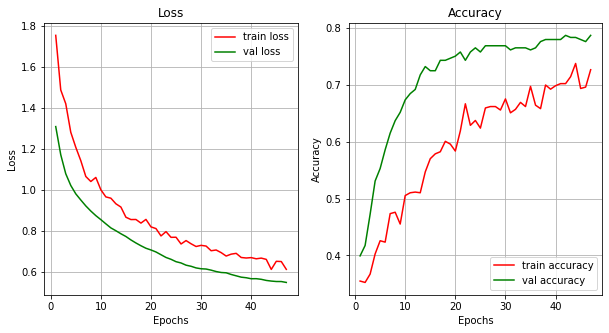

In [9]:
import matplotlib.pyplot as plt

historyData = model.hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [10]:
model.save('./model/6_model_decay_fitting.hdf5')

done saving...


### 6.3. Prediction

In [11]:
result = model.pred(model.data_train['test_x'])
print(np.argmax(result, axis=1))

[2 0 0 1 1 0 2 2 0 0 0 1 2 1 0 1 0 2 0 0 0 2 1 1 2 2 1 2 0 2 0 1 0 1 2 2 2
 0 0 2 2 0 0 0 0 0 0 2 0 1 1 2 0 2 1 0 2 0 2 2 0 2 1 2 1 0 1 0 2 0 1 1 2 1
 2 0 1 0 1 2 2 2 2 1 2 2 0 2 0 1 2 1 2 0 0 2 1 2 2 1 1 1 0 2 2 2 1 1 0 2 2
 1 0 0 0 2 0 1 0 0 2 1 1 0 0 0 0 1 0 0 0 2 0 2 2 2 2 2 0 0 2 1 2 0 2 2 0 1
 2 2 0 2 2 2 2 0 0 0 2 0 2 2 1 0 2 2 0 1 1 1 0 1 2 2 2 0 2 1 1 2 1 2 0 1 1
 0 1 1 0 1 0 1 2 2 1 2 1 2 1 1 1 0 0 1 2 1 2 0 1 0 2 1 0 2 2 2 2 1 0 2 2 1
 1 2 0 0 0 0 2 2 2 2 0 2 0 2 0 0 2 1 2 1 2 2 2 2 2 2 1 2 1 1 1 1 0 0 2 0 0
 0 0 2 0 2 1 1 0 1 0 2 0 2 2]


### 6.4. Evaluation, Implementation, and Visualization

In [12]:
 
THE_PATH = "data/raw/google-third-place-Boston.json"
DATA_DIC = OpenJson(THE_PATH)

CLASS_LIST = []
for i in DATA_DIC:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)

dataDic = DATA_DIC

95
['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storep

In [13]:
# https://www.google.com/maps/place/Boston,+MA/@42.3638848,-71.1082323,17.19z/
urls = [
    "https://www.google.com/maps/@42.334782,-71.0915467,17z",
    "https://www.google.com/maps/place/65+Warren+St,+Roxbury,+MA+02119/@42.3256513,-71.0880961,17z/data=!4m5!3m4!1s0x89e37a30760a320b:0xf9bf464d6bc712f5!8m2!3d42.3280122!4d-71.083529",
    "https://www.google.com/maps/place/42%C2%B019'36.3%22N+71%C2%B005'16.5%22W/@42.3267459,-71.0900917,17z/data=!3m1!4b1!4m6!3m5!1s0x0:0x4ed3e2c10c01eb8!7e2!8m2!3d42.3267423!4d-71.0879032",
    "https://www.google.com/maps/place/148+Chandler+St,+Boston,+MA+02116/@42.346544,-71.0760307,17z/data=!4m13!1m7!3m6!1s0x89e3652d0d3d311b:0x787cbf240162e8a0!2sBoston,+MA!3b1!8m2!3d42.3600825!4d-71.0588801!3m4!1s0x89e37a0d5fa20ab9:0xc78f93b589773cfa!8m2!3d42.3457342!4d-71.0748763",
    "https://www.google.com/maps/place/42%C2%B019'44.7%22N+71%C2%B003'07.6%22W/@42.329073,-71.0543087,656m/data=!3m2!1e3!4b1!4m6!3m5!1s0x0:0x8c44ced5796f96d9!7e2!8m2!3d42.3290732!4d-71.05212",
    "https://www.google.com/maps/place/Central+Square,+Cambridge,+MA+02139/@42.3525163,-71.0555899,139m",
]


dataX = []
for url in urls:
    pos = url.split('@')[-1].split(',')
    loc = { 
        'lat': float(pos[0]), 
        'lon': float(pos[1]),
        
    }
    print(loc)


    # loc['value'] = std_scale.transform([GetDistanceDecay(loc, DATA_DIC, CLASS_LIST)])
    # # loc['value'] = GetDistanceDecay(loc, DATA_DIC, CLASS_LIST)
    # print(loc['value'])
    dataX.append(GetDistanceDecayClosest(loc, DATA_DIC, CLASS_LIST))

{'lat': 42.334782, 'lon': -71.0915467}
{'lat': 42.3256513, 'lon': -71.0880961}
{'lat': 42.3267459, 'lon': -71.0900917}
{'lat': 42.346544, 'lon': -71.0760307}
{'lat': 42.329073, 'lon': -71.0543087}
{'lat': 42.3525163, 'lon': -71.0555899}


In [14]:

result = model.predScaling(dataX)
resultIndex = np.argmax(result, axis=1)
print(result)
print(resultIndex)

[[0.14526537 0.3772386  0.47749603]
 [0.17720063 0.25449416 0.56830525]
 [0.21676473 0.25878158 0.5244537 ]
 [0.20909126 0.23567587 0.5552329 ]
 [0.2590791  0.32295328 0.41796765]
 [0.20897548 0.23571646 0.55530804]]
[2 2 2 2 2 2]


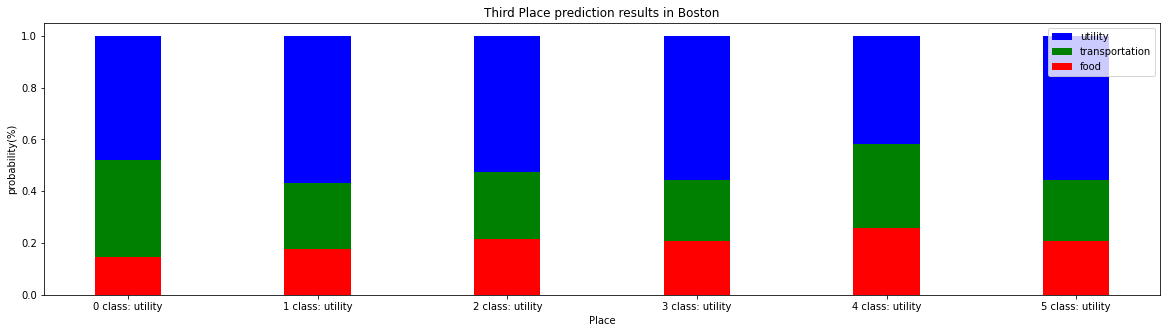

In [15]:
x = [str(i) + " class: " + CLASS_LIST_REDUCED[resultIndex[i]] for i in range(len(resultIndex))]
dataT = result.transpose()
y0 = dataT[0]
y1 = dataT[1]
y2 = dataT[2]

WIDTH = 0.35

plt.figure(figsize=(20,5))
plt.title('Third Place prediction results in Boston',fontsize=12)
plt.xlabel("Place")
plt.ylabel("probability(%)")
plt.bar(x, y0, color = 'r', width = WIDTH, label=CLASS_LIST_REDUCED[0])
plt.bar(x, y1, color = 'g', width = WIDTH, label=CLASS_LIST_REDUCED[1], bottom = y0)
plt.bar(x, y2, color = 'b', width = WIDTH, label=CLASS_LIST_REDUCED[2], bottom = y0 + y1)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=1)
plt.show()

In [16]:
# https://www.google.com/maps/@42.3385469,-71.080132,15.65z
# https://www.google.com/maps/place/42%C2%B019'07.0%22N+71%C2%B003'32.5%22W/@42.318613,-71.0612077,17z/data=!3m1!4b1!4m6!3m5!1s0x0:0xc0f1b0b7ac5aad35!7e2!8m2!3d42.3186133!4d-71.0590189

locs = [
    [42.3395469, -71.102132],
    [42.318613, -71.059019],
]

num = 10
latInterval = (locs[1][0] - locs[0][0]) / num 
logInterval = (locs[1][1] - locs[0][1]) / num 

locations = []
for i in range(10):
    lat = locs[0][0] + i * latInterval 
    long = locs[0][1] + i * logInterval
    locations.append([lat, long])

locations


[[42.3395469, -71.102132],
 [42.33745351, -71.0978207],
 [42.335360120000004, -71.0935094],
 [42.33326673, -71.0891981],
 [42.33117334, -71.0848868],
 [42.32907995, -71.08057550000001],
 [42.32698656, -71.0762642],
 [42.32489317, -71.0719529],
 [42.32279978, -71.0676416],
 [42.32070639, -71.0633303]]

### 6.5. Application

In [17]:
import folium
import matplotlib

# https://www.google.com/maps/@42.3298053,-71.0526862,14.29z
# "OpenStreetMap",
# "Stamen Terrain", "Stamen Toner", "Stamen Watercolor",
# "CartoDB positron", "CartoDB dark_matter"

map = folium.Map(location=[42.3298053, -71.0526862], tiles='CartoDB dark_matter', zoom_start=14, width = "100%", height="100%")

for i in locations:
    lat = (i[0])
    lon = (i[1])
    folium.Marker(
        [lat, lon], 
        popup=i, 
        icon =  folium.Icon(
            color="darkblue",
            # icon_color= hex,
            )
    ).add_to(map)
map

In [18]:
locs = []
for loc in locations:
    loc = { 
        'lat': loc[0], 
        'lon': loc[1],
    }
    print(loc)
    loc['value'] = model.scaler([GetDistanceDecayClosest(loc, DATA_DIC, CLASS_LIST)])
    # loc['value'] = GetDistanceDecay(loc, DATA_DIC, CLASS_LIST)
    # print(loc['value'])
    locs.append(loc)

results = []
for i in locs:
    data = np.array(i["value"])
    # print(data)
    result = model.pred([data])
    results.append(result)
    # print(result)
    # resultDecay = modelDis.predict([i["value"]])
    print('prediction:', CLASS_LIST_REDUCED[np.argmax(result)], result  )
    # break

{'lat': 42.3395469, 'lon': -71.102132}
{'lat': 42.33745351, 'lon': -71.0978207}
{'lat': 42.335360120000004, 'lon': -71.0935094}
{'lat': 42.33326673, 'lon': -71.0891981}
{'lat': 42.33117334, 'lon': -71.0848868}
{'lat': 42.32907995, 'lon': -71.08057550000001}
{'lat': 42.32698656, 'lon': -71.0762642}
{'lat': 42.32489317, 'lon': -71.0719529}
{'lat': 42.32279978, 'lon': -71.0676416}
{'lat': 42.32070639, 'lon': -71.0633303}
prediction: utility [[0.24781787 0.29888162 0.45330057]]
prediction: utility [[0.23183814 0.18874507 0.5794168 ]]
prediction: utility [[0.17330903 0.29933655 0.5273544 ]]
prediction: utility [[0.16754691 0.18747747 0.6449756 ]]
prediction: utility [[0.29165113 0.17366305 0.53468585]]
prediction: utility [[0.1652891 0.2543915 0.5803194]]
prediction: transportation [[0.12724942 0.50659764 0.3661529 ]]
prediction: utility [[0.3755315  0.18400209 0.44046646]]
prediction: utility [[0.13558728 0.0917975  0.77261525]]
prediction: food [[0.6782236  0.05902496 0.26275143]]


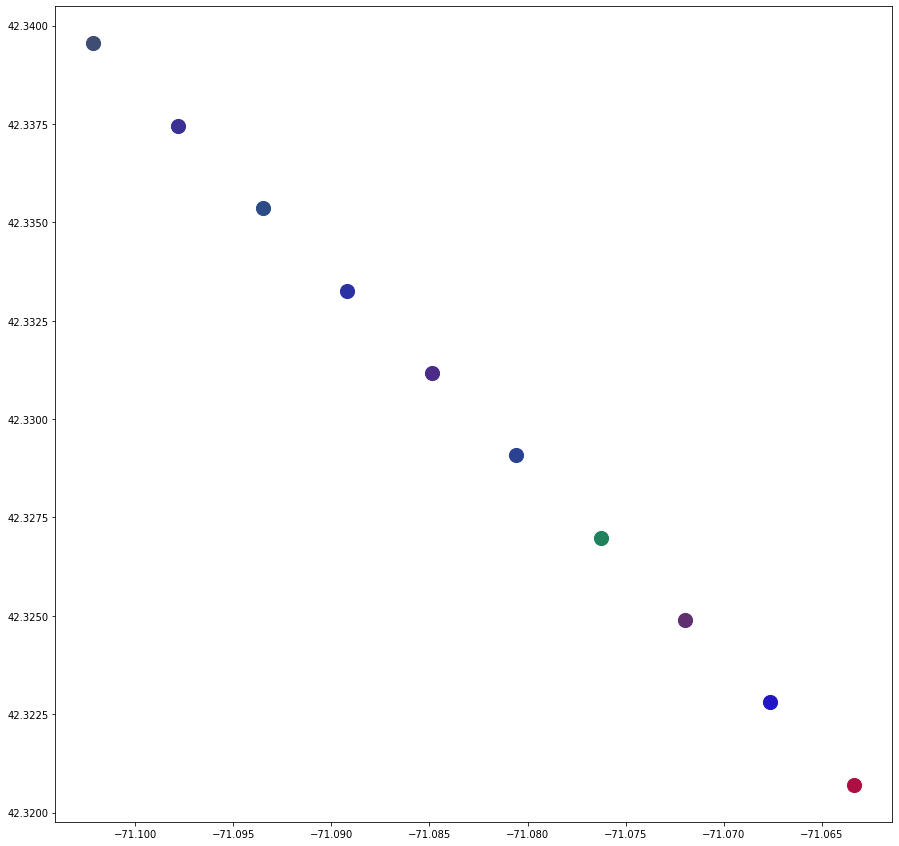

In [19]:
x = []
y = []
c = []

plt.figure(figsize=(15,15))

for i in range(len(locations)):
    y = locations[i][0]
    x = locations[i][1]
    c = results[i]


    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x, y, c = c, s = 200)    
  
plt.show()

In [20]:
def getCenterLoc(data):
    min = [180, 180]
    max = [-180, -180]
    for i in data:
        for pos in data[i]:
            if (pos['lat'] != 0):
                if pos['lat'] < min[0]:
                    min[0] = pos['lat']
                if pos['lon'] < min[1]:
                    min[1] = pos['lon']
                if pos['lat'] > max[0]:
                    max[0] = pos['lat']
                if pos['lon'] > max[1]:
                    max[1] = pos['lon']
    return [
        min[0] + ((max[0] - min[0]) * 0.5),
        min[1] + ((max[1] - min[1]) * 0.5)
    ]
def getBoundaryLoc(DATA_DIC):
    minVal = [180, 180] 
    maxVal = [-180, -180]
    for i in DATA_DIC:
        for p in DATA_DIC[i]:
            if (p['lat'] == 0):
                continue
            lat = p['lat']
            lon = p['lon']
            if(minVal[0] > lat):
                minVal[0] = lat
            if(minVal[1] > lon):
                minVal[1] = lon

            if(maxVal[0] < lat):
                maxVal[0] = lat
            if(maxVal[1] < lon):
                maxVal[1] = lon
    return [minVal, maxVal]

In [21]:
THE_PATH = "data/raw/google-third-place-Boston.json"
DATA_DIC = OpenJson(THE_PATH)
[minVal, maxVal] = getBoundaryLoc(DATA_DIC)
            
print(minVal, maxVal)

[42.2813503, -71.1210401] [42.3388374, -71.0385062]


In [22]:
numLat = 30
numLong = 40

latInterval = (maxVal[0] - minVal[0]) / (numLat - 1)
longInterval = (maxVal[1] - minVal[1]) / (numLong - 1)

geoPts = []
for lat in range(numLat):
    for lon in range(numLong):
        latPos = minVal[0] + (lat * latInterval)
        longPos = minVal[1] + (lon * longInterval)
        geoPts.append([latPos, longPos])

geoPts


[[42.2813503, -71.1210401],
 [42.2813503, -71.11892384615385],
 [42.2813503, -71.1168075923077],
 [42.2813503, -71.11469133846154],
 [42.2813503, -71.11257508461539],
 [42.2813503, -71.11045883076923],
 [42.2813503, -71.10834257692308],
 [42.2813503, -71.10622632307692],
 [42.2813503, -71.10411006923077],
 [42.2813503, -71.10199381538462],
 [42.2813503, -71.09987756153846],
 [42.2813503, -71.09776130769231],
 [42.2813503, -71.09564505384616],
 [42.2813503, -71.0935288],
 [42.2813503, -71.09141254615385],
 [42.2813503, -71.0892962923077],
 [42.2813503, -71.08718003846154],
 [42.2813503, -71.08506378461539],
 [42.2813503, -71.08294753076923],
 [42.2813503, -71.08083127692308],
 [42.2813503, -71.07871502307692],
 [42.2813503, -71.07659876923077],
 [42.2813503, -71.07448251538462],
 [42.2813503, -71.07236626153846],
 [42.2813503, -71.07025000769231],
 [42.2813503, -71.06813375384615],
 [42.2813503, -71.0660175],
 [42.2813503, -71.06390124615385],
 [42.2813503, -71.0617849923077],
 [42.2813

In [23]:
X = []
for loc in geoPts:
    loc = { 
        'lat': loc[0], 
        'lon': loc[1],
    }
    data = GetDistanceDecayClosest(loc, DATA_DIC, CLASS_LIST)
    X.append(data)

In [24]:
results = model.predScaling(X)
results

array([[0.20710346, 0.241174  , 0.5517225 ],
       [0.20698175, 0.27185234, 0.5211659 ],
       [0.19316967, 0.43535048, 0.37147993],
       ...,
       [0.22114547, 0.49272746, 0.28612715],
       [0.11851453, 0.35793886, 0.52354664],
       [0.21480744, 0.28761768, 0.49757496]], dtype=float32)

### 6.6. Dominant Third Place in the area

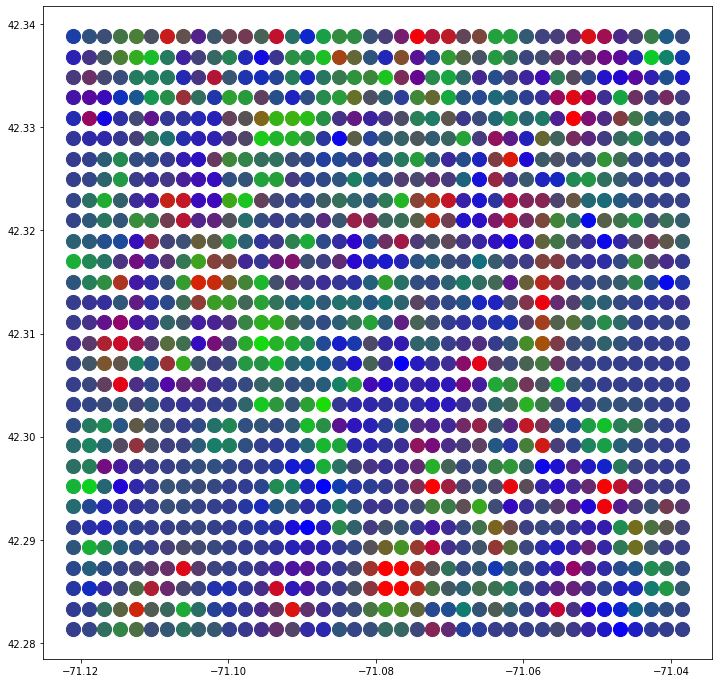

In [25]:
SCALE = 3
plt.figure(figsize=(4 * SCALE, 4 * SCALE))

for i in range(len(geoPts)):
    plt.scatter(
        x = geoPts[i][1],
        y = geoPts[i][0],
        c = [results[i]],
        s = 200)

plt.show()

In [26]:
def getCenterLocViz(data):
    min = [180, 180]
    max = [-180, -180]
    for p in data:
        if p[0] < min[0]:
            min[0] = p[0]
        if p[1] < min[1]:
            min[1] = p[1]
        if p[0] > max[0]:
            max[0] = p[0]
        if p[1] > max[1]:
            max[1] = p[1]
    return [
        min[0] + ((max[0] - min[0]) * 0.5),
        min[1] + ((max[1] - min[1]) * 0.5)
    ]

In [27]:
cenLoc = getCenterLocViz(geoPts)
def rgb_to_hex(col):
    return '%02x%02x%02x' % (int(col[0]*255),int(col[1]*255),int(col[2]*255))

map = folium.Map(location=[cenLoc[0], cenLoc[1]], tiles='CartoDB dark_matter', zoom_start=14, width = "100%", height="100%")

for i, geoPt in enumerate(geoPts):
    lat = (geoPt[0])
    lon = (geoPt[1])
    col = rgb_to_hex(list(results[i]))

    folium.Marker(
        [lat, lon], 
        popup="{}: {:.2f}, {}: {:.2f}, {}: {:.2f}".format(
            CLASS_LIST_REDUCED[0], results[i][0], 
            CLASS_LIST_REDUCED[1], results[i][1], 
            CLASS_LIST_REDUCED[2], results[i][2]),
        icon = folium.Icon(
            color="black",
            icon_color="#{}".format(col),
        )
    ).add_to(map)
map

In [28]:
results

array([[0.20710346, 0.241174  , 0.5517225 ],
       [0.20698175, 0.27185234, 0.5211659 ],
       [0.19316967, 0.43535048, 0.37147993],
       ...,
       [0.22114547, 0.49272746, 0.28612715],
       [0.11851453, 0.35793886, 0.52354664],
       [0.21480744, 0.28761768, 0.49757496]], dtype=float32)

In [29]:
def km2Lat(km):
    return (km / 6378) * (180. / math.pi)
def km2Lon(km, lat):
    return (km / 6378) * (180. / math.pi) / math.cos(lat * math.pi / 180)

km = 1
print(km2Lat(km))
print(km2Lon(km, 42))

0.008983345800106981
0.012088284129995932


In [30]:
locInspection = [42.3269984,-71.0754084]
dis = 0.5 # km
min =[
    42.3269984 - km2Lat(dis),
    -71.0754084 - km2Lon(dis, locInspection[0])
]
max = [
    42.3269984 + km2Lat(dis),
    -71.0754084 + km2Lon(dis, locInspection[0])
]
print (min)
print (max)

[42.32250672709995, -71.08148386132899]
[42.33149007290005, -71.06933293867101]


In [31]:
distance = 40
print(1000 / distance, 'Meter per dot') 

25.0 Meter per dot


In [32]:
numLat = distance
numLong = distance

latIntervalZoomed = (min[0]  - max[0]) / (numLat - 1)
longIntervalZoomed = (min[1] - max[1]) / (numLong - 1)

X_OFF = (latInterval * 6)
Y_OFF = -(latInterval * 8)

geoPts = []
for lat in range(numLat):
    for lon in range(numLong):
        latPos = max[0] + latIntervalZoomed  + (lat * latIntervalZoomed)
        longPos = max[1] + longIntervalZoomed  + (lon * longIntervalZoomed)
        geoPts.append([latPos, longPos])
X = []
for loc in geoPts:
    loc = {  'lat': loc[0], 'lon': loc[1]}
    data = GetDistanceDecayClosest(loc, DATA_DIC, CLASS_LIST)
    X.append(data)
results = model.predScaling(X)

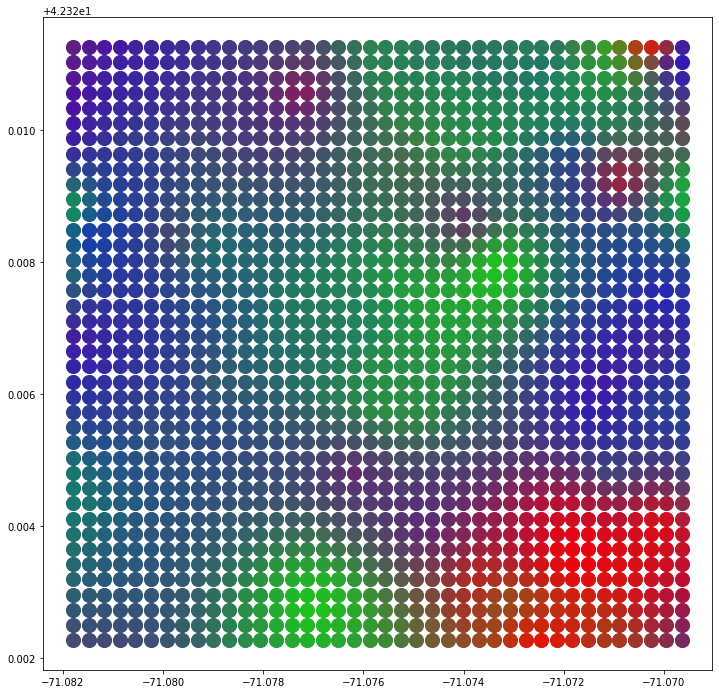

In [33]:
SCALE = 3
plt.figure(figsize=(4 * SCALE, 4 * SCALE))
for i in range(len(geoPts)):
    plt.scatter(
        x = geoPts[i][1],
        y = geoPts[i][0],
        c = [results[i]],
        s = 200)
plt.show()

In [34]:
map = folium.Map(location=[locInspection[0], locInspection[1]], tiles='CartoDB dark_matter', zoom_start=16, width = "100%", height="100%")

for i, geoPt in enumerate(geoPts):
    lat = (geoPt[0])
    lon = (geoPt[1])
    col = rgb_to_hex(list(results[i]))

    folium.Marker(
        [lat, lon], 
        popup="{}: {:.2f}, {}: {:.2f}, {}: {:.2f}".format(
            CLASS_LIST_REDUCED[0], results[i][0], 
            CLASS_LIST_REDUCED[1], results[i][1], 
            CLASS_LIST_REDUCED[2], results[i][2]),
        icon = folium.Icon(
            color="black",
            icon_color="#{}".format(col),
        )
    ).add_to(map)
map

In [35]:
print("done!")

done!


-----
### References & Useful links

Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore. https://doi.org/10.1007/978-981-33-4400-6_11



Oldenburg, R., Brissett, (1982). D.: The third place. Qual. Sociol. 5(4), 265–284



Lee, Namju. (2022). Computational Design, Seoul, Bookk, https://brunch.co.kr/@njnamju/144



Lee, Namju, (2022). Discrete Urban Space and Connectivity, https://nj-namju.medium.com/discrete-urban-space-and-connectivity-492b3dbd0a81



Woo. Junghyun, (2022). Numeric Network Analysis for Pedestrians, https://axuplatform.medium.com/0-numeric-network-analysis-47a2538e636c



Lee, Namju, (2022). Computational Design Thinking for Designers, https://nj-namju.medium.com/computational-design-thinking-for-designers-68224bb07f5c



Lee, Namju. (2016). Third Place Mobility Energy Consumption Per Person, http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab 
